# Solution 07  Logistische Regression

## Task 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (a) Calculate the model predictions

In [2]:
def logistic1d(w0, w1, x):
    print(f"w0={w0}")
    print(f"w1={w1}")
    print(f"x={x}")
    return 1/(1+np.exp(-w0 - w1*x))

x = np.array([-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1])

f1 = logistic1d(0, 5, x)
print(f"f_1(X)=\n{f1}\n")

f2 = logistic1d(0, 10, x)
print(f"f_2(X)=\n{f2}\n")

f3 = logistic1d(1, 10, x)
print(f"f_3(X)=\n{f3}")

w0=0
w1=5
x=[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
f_1(X)=
[0.00669285 0.01798621 0.04742587 0.11920292 0.26894142 0.5
 0.73105858 0.88079708 0.95257413 0.98201379 0.99330715]

w0=0
w1=10
x=[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
f_2(X)=
[4.53978687e-05 3.35350130e-04 2.47262316e-03 1.79862100e-02
 1.19202922e-01 5.00000000e-01 8.80797078e-01 9.82013790e-01
 9.97527377e-01 9.99664650e-01 9.99954602e-01]

w0=1
w1=10
x=[-1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1. ]
f_3(X)=
[1.23394576e-04 9.11051194e-04 6.69285092e-03 4.74258732e-02
 2.68941421e-01 7.31058579e-01 9.52574127e-01 9.93307149e-01
 9.99088949e-01 9.99876605e-01 9.99983299e-01]


### (b) Plot the three model functions

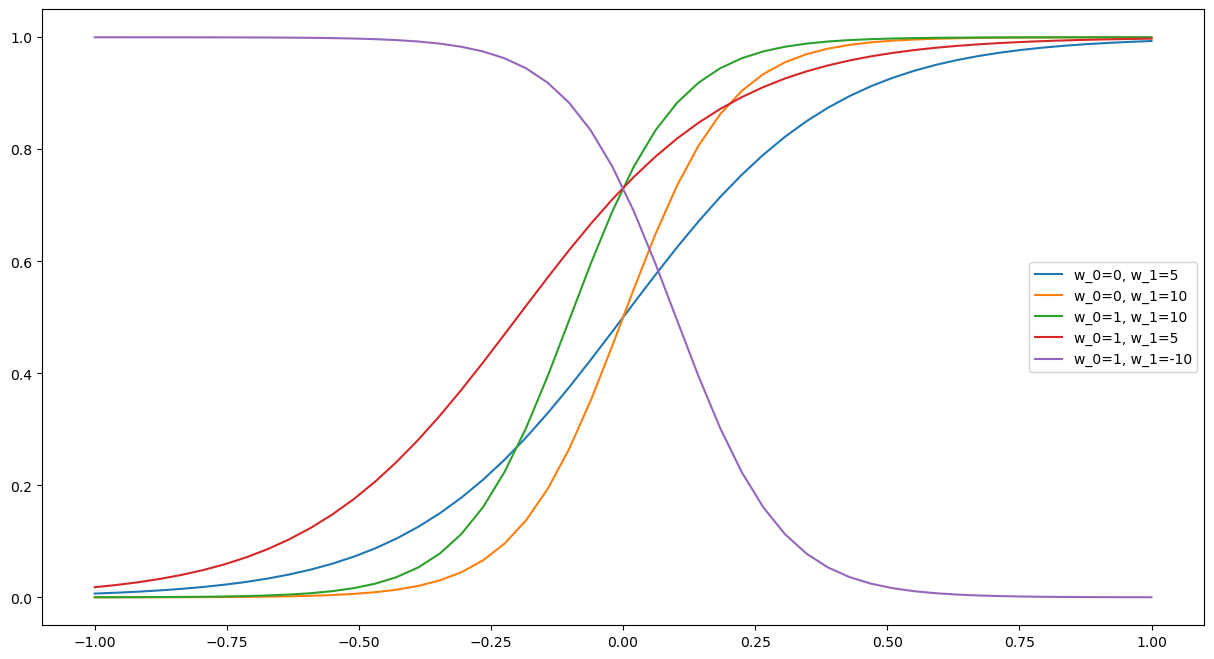

In [3]:
x = np.linspace(-1,1,50)

plt.rcParams['figure.figsize'] = [15, 8]

def logistic1d(w0, w1, x):
    return 1/(1+np.exp(-w0 - w1*x))

y1 = logistic1d(0,5,x)
plt.plot(x, y1, label="w_0=0, w_1=5")

y2 = logistic1d(0,10,x)
plt.plot(x, y2, label="w_0=0, w_1=10")

y3 = logistic1d(1,10,x)
plt.plot(x, y3, label="w_0=1, w_1=10")

y4 = logistic1d(1,5,x)
plt.plot(x, y4, label="w_0=1, w_1=5")

y5 = logistic1d(1,-10,x)
plt.plot(x, y5, label="w_0=1, w_1=-10")

plt.legend()

$w_0$ (intercept) and $w_1$ (coefficient) determine the shape and orientation of the logistic regression decision boundary in a graphical sense.

$w_0$ (intercept) determines where the decision boundary crosses the y-axis (when $x_1$ = 0). If $-w_0$ is positive, the decision boundary will be shifted to the right, and if it's negative, it will be shifted to the left.

In other words, in a 2D plot, the intercept ($w_0$) shifts the decision boundary up or down (left or right).

$w_1$ (coefficient) for the feature ($x_1$) determines the slope or orientation of the decision boundary. It indicates the effect of the feature on the decision boundary. A positive $w_1$ means that as the feature's value ($x_1$) increases, the probability of belonging to the positive class increases.


### (c) Cross-entropy loss function 

In [4]:
y = np.array([0,0,0,0,0,0,1,1,1,1,1])
l = -np.mean(y*np.emath.log(f3) + (1 - y)*np.emath.log(1-f3))

print(f"L(1, 10)={l}")

L(1, 10)=0.1581104740009526


### (d) Decision boundary 

B = 0.5 means that class = 0 if $f(x)<0.5$, and class =1 if $f(x)>=0.5$

So the decision boundary $x$ makes $f(x)=0.5$

$f(x)=1/(1+e^{-(w_0+w_1*x)})$

Therefore, $w_0 + w_1 x_1$=0

For $f_1$, $w_0=0$, $w_1=5$, the dicision boundary is 0.

For $f_2$, $w_0=0$, $w_1=10$, the dicision boundary is 0.

For $f_3$, $w_0=1$, $w_1=10$, the dicision boundary is $-1/10$.




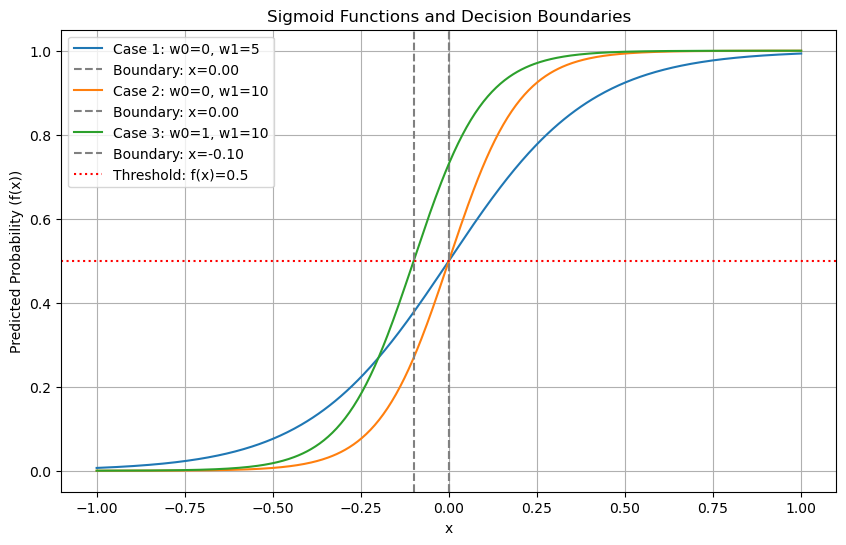

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define parameters for each case
cases = [
    {"w0": 0, "w1": 5, "label": "Case 1: w0=0, w1=5"},
    {"w0": 0, "w1": 10, "label": "Case 2: w0=0, w1=10"},
    {"w0": 1, "w1": 10, "label": "Case 3: w0=1, w1=10"}
]

# Create x values for plotting
x = np.linspace(-1, 1, 500)

# Plot sigmoid functions and decision boundaries for each case
plt.figure(figsize=(10, 6))

for case in cases:
    w0, w1 = case["w0"], case["w1"]
    z = w0 + w1 * x
    y = sigmoid(z)
    
    # Plot sigmoid curve
    plt.plot(x, y, label=case["label"])
    
    # Plot decision boundary
    decision_boundary = -w0 / w1 if w1 != 0 else 0
    plt.axvline(decision_boundary, color='gray', linestyle='--', label=f"Boundary: x={decision_boundary:.2f}")

# Add labels, legend, and grid
plt.title("Sigmoid Functions and Decision Boundaries")
plt.xlabel("x")
plt.ylabel("Predicted Probability (f(x))")
plt.axhline(0.5, color='red', linestyle=':', label="Threshold: f(x)=0.5")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## Task 2

If B = 1/3, $e^{-(w^Tx)}=2 => -(w^Tx)= ln 2$



## Task 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import roc_curve

dataset = {
"kkt" : [0,1,2,3,4,5,6,7,8,9],
"healthy" : [42,23,18,9,4,2,2,0,0,0],
"ill" : [0,0,0,2,10,10,22,41,10,5]
}
df2=pd.DataFrame(dataset)
df2

,kkt,healthy,ill
0,0,42,0
1,1,23,0
2,2,18,0
3,3,9,2
4,4,4,10
5,5,2,10
6,6,2,22
7,7,0,41
8,8,0,10
9,9,0,5


In [6]:
# Let's calculate all the KPIs for every possible decision boundary, 
# i.e., if the decision boundary is 0, 1, ... or 9.

df2["TP"] = df2["ill"].sum() - (df2["ill"].cumsum() - df2["ill"])
df2["FP"] = df2["healthy"].sum() - (df2["healthy"].cumsum() - df2["healthy"])# Type I error, unnecessary treatment
df2["FN"] = df2["ill"].cumsum() - df2["ill"]  # Type II error, miss sick people
df2["TN"] = df2["healthy"].cumsum() - df2["healthy"] 

df2["accuracy"] = (df2["TP"] + df2["TN"]) / (df2["TP"] + df2["TN"] + df2["FP"] + df2["FN"])
df2["precision"] = df2["TP"] / (df2["TP"] + df2["FP"])
df2["recall"] = df2["TP"]  / (df2["TP"] + df2["FN"])
df2["F1"] = 2 * df2["precision"] * df2["recall"] / (df2["precision"] + df2["recall"])
display(df2["ill"].sum())
display(df2["healthy"].sum())
display(df2)

100

100

,kkt,healthy,ill,FN,TN,TP,FP,accuracy,precision,recall,F1
0,0,42,0,0,0,100,100,0.500,0.500000,1.00,0.666667
1,1,23,0,0,42,100,58,0.710,0.632911,1.00,0.775194
2,2,18,0,0,65,100,35,0.825,0.740741,1.00,0.851064
3,3,9,2,0,83,100,17,0.915,0.854701,1.00,0.921659
4,4,4,10,2,92,98,8,0.950,0.924528,0.98,0.951456
5,5,2,10,12,96,88,4,0.920,0.956522,0.88,0.916667
6,6,2,22,22,98,78,2,0.880,0.975000,0.78,0.866667
7,7,0,41,44,100,56,0,0.780,1.000000,0.56,0.717949
8,8,0,10,85,100,15,0,0.575,1.000000,0.15,0.260870
9,9,0,5,95,100,5,0,0.525,1.000000,0.05,0.095238


a) For all $m\geq7$ there are no more false positives, i.e., Type I error (healthy people are recognized as sick)

b) For all $m\leq3$ there are no more false negatives, i.e., Type II error (sick people are recognized as healthy)

c) Accuracy is maximal when all patients with kkt >= 4 are classified as ill.

In [7]:
df2[df2["accuracy"] == df2["accuracy"].max()]

,kkt,healthy,ill,FN,TN,TP,FP,accuracy,precision,recall,F1
4,4,4,10,2,92,98,8,0.95,0.924528,0.98,0.951456


d) Confusion matrix

In [8]:
df2[df2["kkt"] == 5][["TP","FP","FN","TN"]]

,TP,FP,FN,TN
5,88,4,12,96


e) Recall, precision, accuracy, F1 for m=5

In [9]:
df2[df2["kkt"] == 5][["recall","precision","accuracy","F1"]]

,recall,precision,accuracy,F1
5,0.88,0.956522,0.92,0.916667


f) ROC Diagram

<Axes: xlabel='FPR', ylabel='recall'>

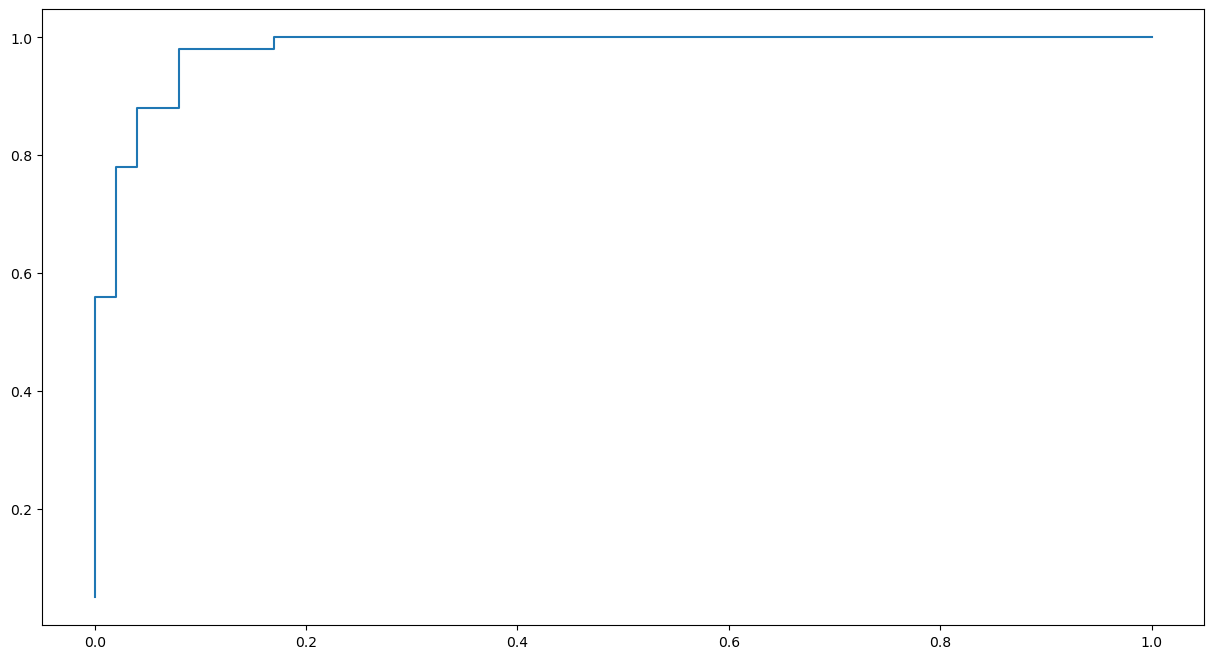

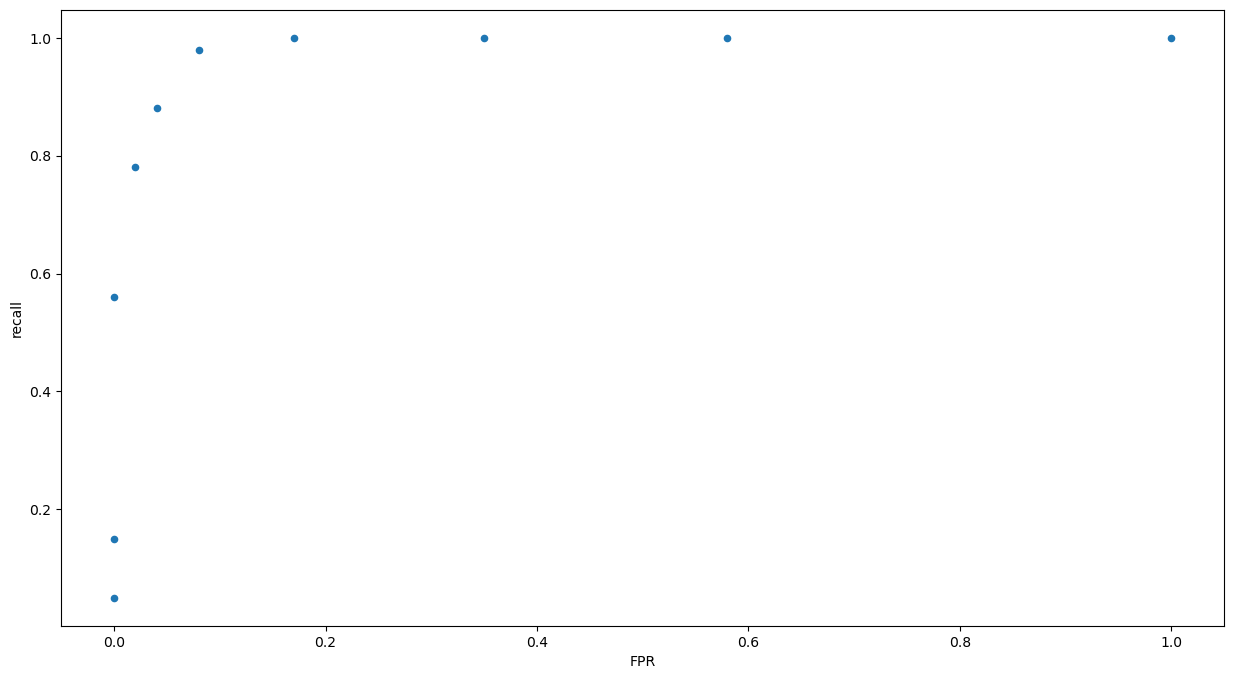

In [10]:
df2["FPR"] = df2["FP"] / (df2["FP"] + df2["TN"])
plt.step(x = df2["FPR"], y = df2["recall"])
df2.plot.scatter(x="FPR", y="recall")

## Task 4

### (a) Training logistische Regression

In [9]:
df = pd.read_csv("../data/kkt.csv")
y = df["diagnose"]
m = linear_model.LogisticRegression(fit_intercept=True).fit(df["kkt"].values.reshape(-1,1), y)
df

,kkt,diagnose
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
195,9,1
196,9,1
197,9,1
198,9,1


### (b) Decision boundary

In [10]:
p = m.predict_proba(np.array(range(10)).reshape(-1, 1))
print(p)
print(f"Decision boundary={np.argmax(p[:,1]>0.5)}")

[[9.97761693e-01 2.23830744e-03]
 [9.89365202e-01 1.06347978e-02]
 [9.51017514e-01 4.89824855e-02]
 [8.02058066e-01 1.97941934e-01]
 [4.58184121e-01 5.41815879e-01]
 [1.50010650e-01 8.49989350e-01]
 [3.55238798e-02 9.64476120e-01]
 [7.62822720e-03 9.92371773e-01]
 [1.60167120e-03 9.98398329e-01]
 [3.34691317e-04 9.99665309e-01]]
Decision boundary=4


### (c) Function that makes a class prediction for any threshold B

In [11]:
# probabilities is supposed to be a Numpy array as returned by .predict_proba() (N rows, 2 columns).
# The method compares each element of the array with the value B and returns an array with True/False entries.
# True/False entries are explicitly cast as integer (True->1, False->0).

def predict_class(B, probabilities):
    return (probabilities >= B)[:,1].astype(int)

df["pred"] = m.predict(df["kkt"].values.reshape(-1,1))
# Example values for prediction
kkt_test = np.array(range(10))
diagnose = predict_class(0.5, m.predict_proba(kkt_test.reshape(-1,1)))

pd.DataFrame({"kkt": kkt_test, "Diagnose": diagnose})

,kkt,Diagnose
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1
5,5,1
6,6,1
7,7,1
8,8,1
9,9,1


Metrics for different thresholds for the *probability* $B$

In [14]:
B = 0.75 # for example
y_pred = predict_class(B, m.predict_proba(df["kkt"].values.reshape(-1,1)))

from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
print(f"recall (B={B}): {recall_score(y, y_pred)}")
print(f"precision (B={B}): {precision_score(y, y_pred)}")
print(f"accuracy (B={B}): {accuracy_score(y, y_pred)}")
print(f"f1 (B={B}): {f1_score(y, y_pred)}")

recall (B=0.75): 0.88
precision (B=0.75): 0.9565217391304348
accuracy (B=0.75): 0.92
f1 (B=0.75): 0.9166666666666666


[       inf 0.99966556 0.99839915 0.99237389 0.96447774 0.84996565
 0.54171191 0.19783848 0.04894129 0.01062304 0.00223529]


<Axes: xlabel='kkt', ylabel='diagnose'>

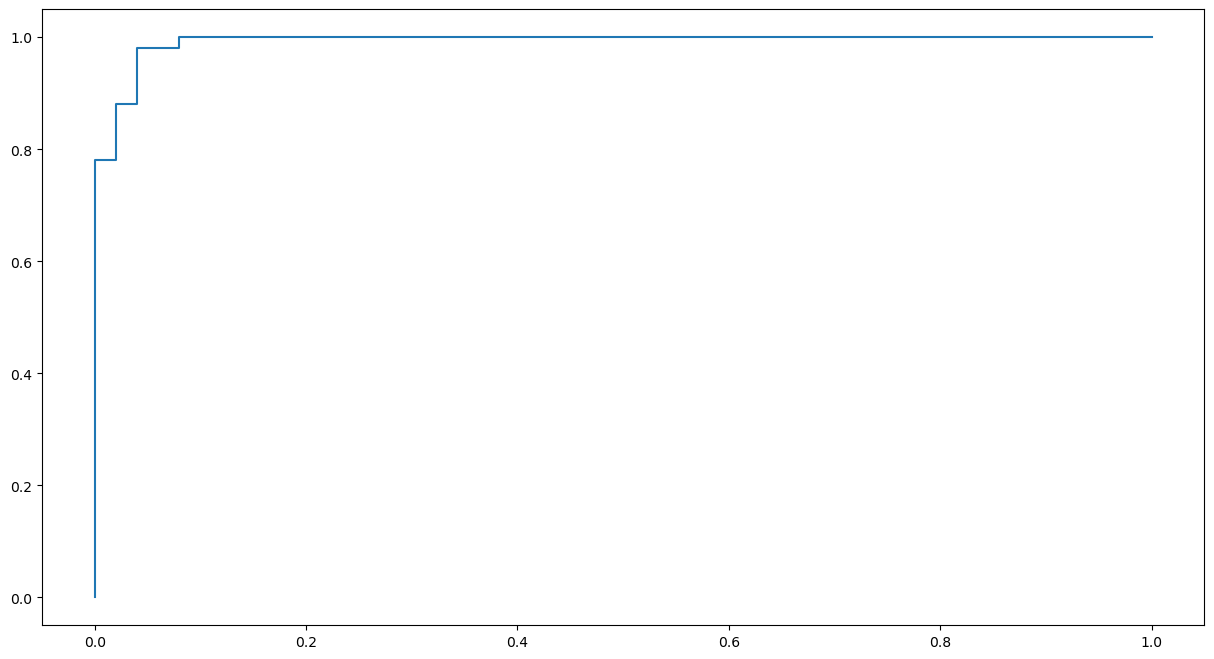

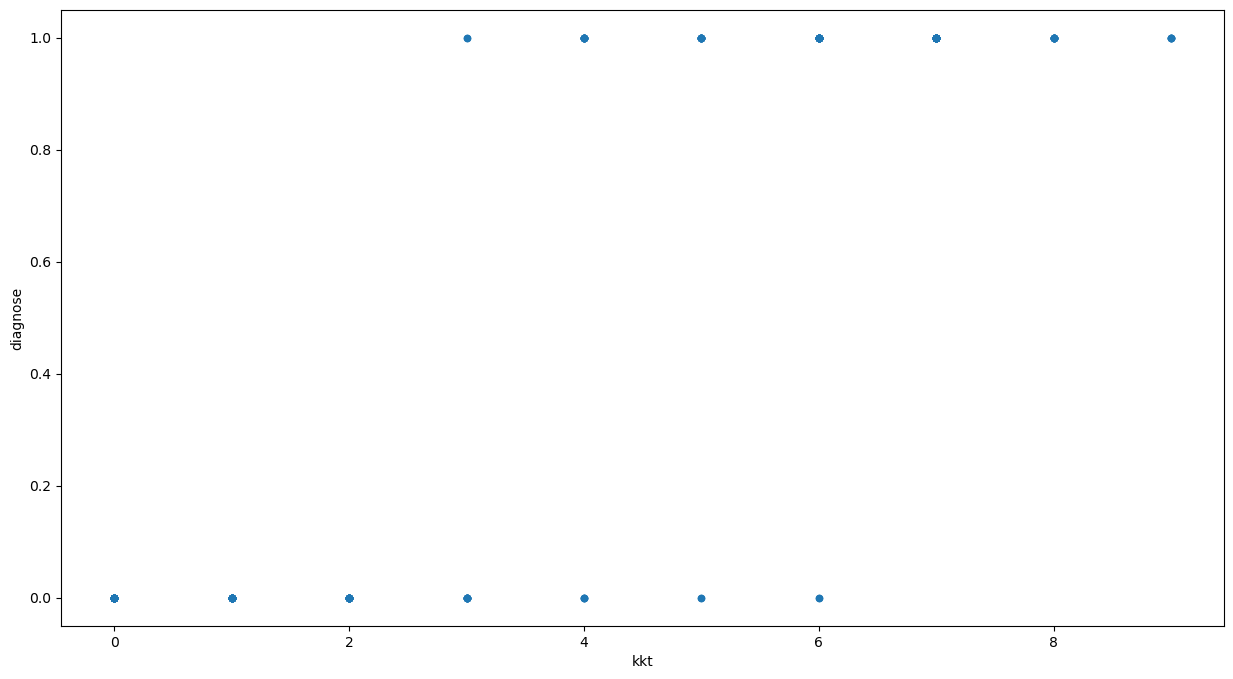

In [15]:
fpr2, tpr2, thresholds2 = roc_curve(df["diagnose"], m.predict_proba(df["kkt"].values.reshape(-1,1))[:,1])
plt.step(fpr2,tpr2)
print(thresholds2)

df.plot.scatter(x="kkt",y="diagnose")

### (d) fit_intercept=False

In [14]:
m2 = linear_model.LogisticRegression(fit_intercept=False).fit(df["kkt"].values.reshape(-1,1), y)
kkt_test = np.array(range(10))
pd.DataFrame({"kkt": kkt_test, "Diagnose": m2.predict(kkt_test.reshape(-1,1)), "Diagnose Proability": m2.predict_proba(kkt_test.reshape(-1,1))[:,1]})

,kkt,Diagnose,Diagnose Proability
0,0,0,0.500000
1,1,1,0.571091
2,2,1,0.639364
3,3,1,0.702432
4,4,1,0.758635
5,5,1,0.807136
6,6,1,0.847847
7,7,1,0.881228
8,8,1,0.908080
9,9,1,0.929348


fit_intercept=False means $w_0=0$ (for both linear and logistic regression). If $w_0=0$, the logistic regression prediction for the value 0 is always $0.5$. Since the sigmoid function is monotonic (increasing or decreasing, depending on the sign of $w_1$), the model can only provide probabilities >=0.5 or only probabilities <=0.5. Thus, for the same data (and without manually tuning the threshold $B$), the model is significantly worse.
